# Example Usage


In [5]:
import numpy as np
import Py6S
from matplotlib import pyplot as plt

from rtm_wrapper import Py6SDenseOutput, make_sixs_wrapper

# Setup

In [16]:
s = make_sixs_wrapper()
s.aero_profile = Py6S.AeroProfile.PredefinedType(Py6S.AeroProfile.Maritime)
s.altitudes.set_target_sea_level()
s.altitudes.set_sensor_satellite_level()
s.ground_reflectance = Py6S.GroundReflectance().HomogeneousLambertian(0.7)

wl_spacing = 0.0025
wl = np.arange(0.4, 2.5 + wl_spacing, wl_spacing)

# Run experiment

In [18]:
_, raw_output_list = Py6S.SixSHelpers.Wavelengths.run_wavelengths(s, wl)

# Extract output arrays.
outputs = Py6SDenseOutput.from_py6s(raw_output_list)

Running for many wavelengths - this may take a long time


# Plot Radiances

Text(0.5, 1.0, 'Measured Apparent Radiance Components')

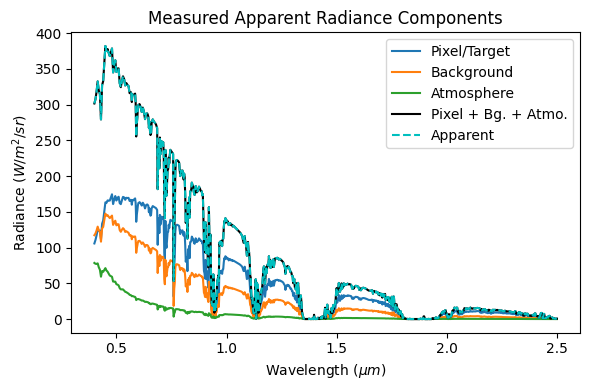

In [21]:
fig, ax = plt.subplots(figsize=(6, 4), layout="tight")

ax.plot(wl, outputs.pixel_radiance, label="Pixel/Target")
ax.plot(wl, outputs.background_radiance, label="Background")
ax.plot(wl, outputs.atmospheric_intrinsic_radiance, label="Atmosphere")
ax.plot(
    wl,
    outputs.pixel_radiance
    + outputs.background_radiance
    + outputs.atmospheric_intrinsic_radiance,
    label="Pixel + Bg. + Atmo.",
    color="k",
)
ax.plot(wl, outputs.apparent_radiance, label="Apparent", linestyle="--", color="c")

ax.legend()
ax.set_xlabel(r"Wavelength ($\mu m$)")
ax.set_ylabel(r"Radiance ($W/m^2/sr$)")
ax.set_title("Measured Apparent Radiance Components")